In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv
/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [3]:
train = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv')
train.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [4]:
test = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv')
test.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [5]:
sample_sub = pd.read_csv('/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv')
sample_sub.head()

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


> ****umumiy malumot**

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [7]:
train['flight'].unique()

array(['UK-810', 'SG-5094', 'UK-846', ..., 'AI-489', 'G8-213', '6E-7201'],
      dtype=object)

In [8]:
train['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [9]:
train1 = train.sample(33)
train1['flight'].unique()

array(['AI-439', 'UK-941', 'UK-977', 'UK-878', 'AI-675', 'G8-7555',
       'AI-888', 'UK-988', 'UK-720', 'UK-810', 'UK-873', 'UK-830',
       'UK-836', 'G8-422', 'G8-512', 'AI-768', 'G8-2513', 'AI-503',
       'UK-708', 'G8-283', 'AI-763', 'AI-636', 'UK-850', 'AI-808',
       '6E-5394', 'AI-440', '6E-939', 'UK-801', 'I5-1228'], dtype=object)

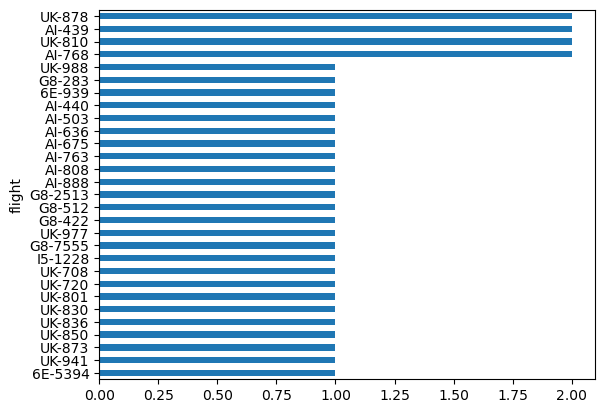

In [10]:
train1.groupby('flight')['flight'].count().sort_values(ascending=True).plot.barh();


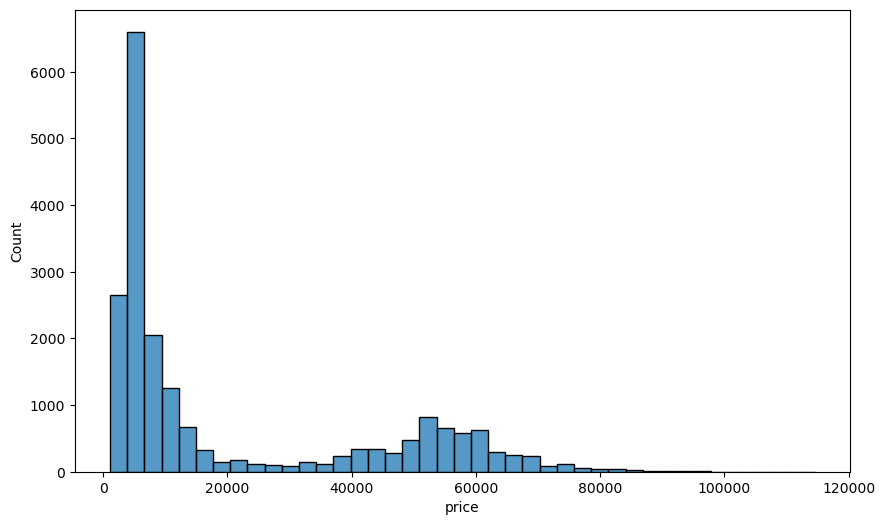

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='price')
plt.show()

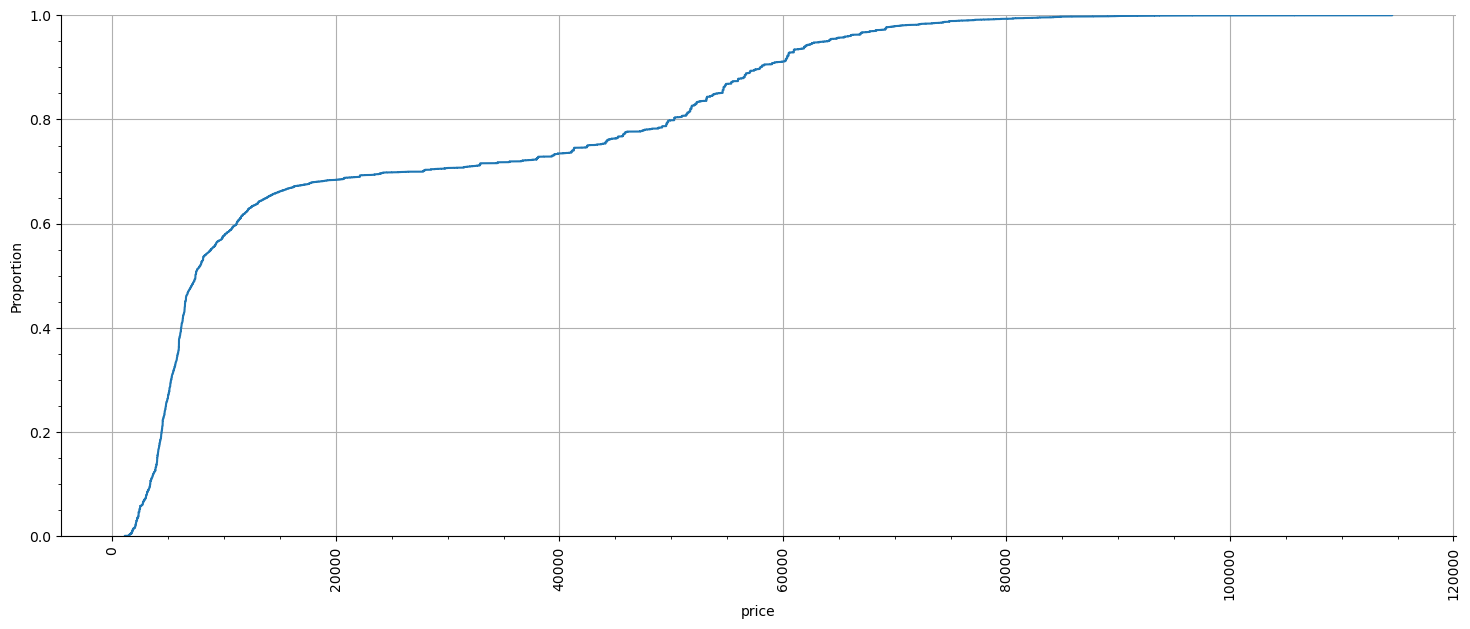

In [12]:
sns.displot(data=train, x='price', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='major')
plt.minorticks_on()
plt.show()

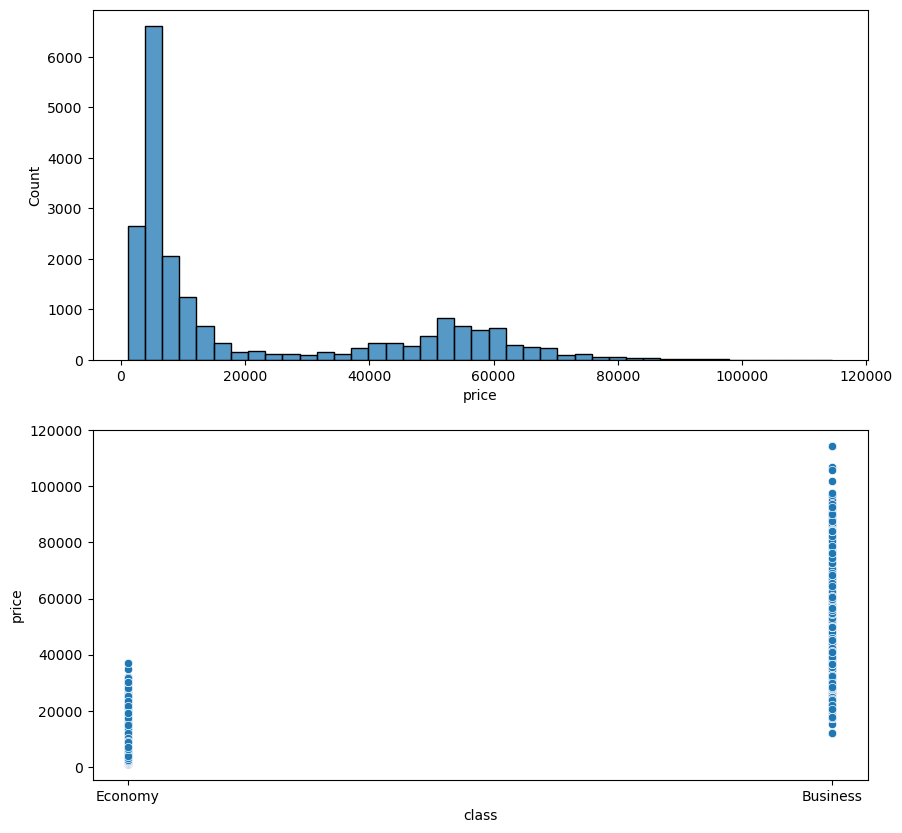

In [13]:
#biletni narxi uning classiga bogliq

fig, ax = plt.subplots(2, 1, figsize=(10,10))
# Umumiy chizma nomini beramiz:
sns.histplot(ax=ax[0], data=train, x='price')
sns.scatterplot(ax=ax[1], data=train, x=train['class'], y=train['price'])
plt.show()

In [14]:
train['kfold'] = -1
kf = model_selection.KFold(n_splits=5,shuffle=True,random_state=99)
for fold,(train_indicies,valid_indicies) in enumerate(kf.split(X=train)):
    train.loc[valid_indicies,'kfold'] = fold


In [15]:
df = train.copy()


useful_features = [c for c in df.columns if c not in ("id", "price", "kfold")]

# categoria ustunlarimiz
object_cols = ['airline','flight','source_city','departure_time','stops','arrival_time','destination_city','class'] 
test = test[useful_features]

In [16]:
final_predictions = []
for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = test.copy()

    ytrain = xtrain.price
    yvalid = xvalid.price
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-999)
    xtrain[object_cols] = ordinal_encoder.fit_transform(xtrain[object_cols])
    xvalid[object_cols] = ordinal_encoder.transform(xvalid[object_cols])
    xtest[object_cols] = ordinal_encoder.transform(xtest[object_cols])
    
    model = XGBRegressor(random_state=fold, n_jobs=4)
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_predictions.append(test_preds)
    print(fold, mean_squared_error(yvalid, preds_valid, squared=False))

0 3594.709260707636
1 3438.7691222484164
2 3347.632104399266
3 3396.166446412156
4 3531.598968509821


In [17]:
baholash = np.mean(np.column_stack(final_predictions), axis=1)

In [18]:
sample_sub.price = baholash
sample_sub.to_csv("submission.csv1", index=False)
sample_sub

,id,price
0,1,58207.132812
1,2,63278.175781
2,3,24384.445312
3,4,2416.564697
4,5,5873.898438
...,...,...
4995,4996,58678.867188
4996,4997,4745.448242
4997,4998,51510.433594
4998,4999,46974.621094
